# Exploring Relationships

### Contents:

#### 01. Importing Libraries and Data
#### 02. Data Cleaning
#### 03. Exploring Relationships
     03a. Correlations
     03b. Scatterplots
     03c. Pair Plots
     03d. Categorical Plots
#### 04. Exporting Data and Figures

## 01. Importing Libraries and Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [3]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [4]:
# Define path for importing the data

path = r'C:\Users\jenci\Documents\Data Analytics\Data Analytics\Advanced Analytics and Dashboard Design\Acheivement 6'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hrrp_hgi_hvbp_merged.csv'))

## 02. Data Cleaning

> **Note:**
> While the data has already been cleaned, wrangled, and prepared, we are performing an additional check to ensure the integrity of our exploratory data analysis

In [6]:
# Check shape

df.shape

(10344, 44)

In [7]:
# Check data

df.head(5)

,Facility ID,Facility Name,State,Address,City/Town,ZIP Code,County/Parish,Telephone Number,Hospital Type,Hospital Ownership,Emergency Services,Promotes Interoperability of EHRs,Birthing Friendly Facility,Hospital Overall Rating,Measure Name,Excess Readmission Ratio,Observed Readmission Rate,Expected Readmission Rate,Excess Readmissions Threshold,Count of Facility MORT Measures,MORT Measures Better,MORT Measures Worse,Count of Facility Safety Measures,Safety Measures Better,Safety Measures Worse,Count of Facility READM Measures,READM Measures Better,READM Measures Worse,MORT-30-AMI Benchmark,MORT-30-AMI Performance Rate,AMI Normative Performance Index,AMI Performance Comparison,MORT-30-HF Benchmark,MORT-30-HF Performance Rate,HF Normative Performance Index,HF Performance Comparison,MORT-30-PN Benchmark,MORT-30-PN Performance Rate,PN Normative Performance Index,PN Performance Comparison,MORT-30-COPD Benchmark,MORT-30-COPD Performance Rate,COPD Normative Performance Index,COPD Performance Comparison
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-HIP-KNEE-HRRP,0.8916,3.5325,3.9618,Below Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-HF-HRRP,1.1003,23.1263,21.0184,Above Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-AMI-HRRP,0.9332,12.9044,13.8283,Below Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-PN-HRRP,0.9871,17.0529,17.2762,Below Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-CABG-HRRP,0.9517,9.8131,10.3112,Below Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers


### Duplicates Check:

In [8]:
# Check for duplicates

df_dups = df[df.duplicated()]

In [9]:
df_dups.shape

(0, 44)

> The '0' denotes no duplicates present.

### Missing Values Check:

In [10]:
# Check for missing values

df.isnull().sum()

Facility ID                          0
Facility Name                        0
State                                0
Address                              0
City/Town                            0
ZIP Code                             0
County/Parish                        0
Telephone Number                     0
Hospital Type                        0
Hospital Ownership                   0
Emergency Services                   0
Promotes Interoperability of EHRs    0
Birthing Friendly Facility           0
Hospital Overall Rating              0
Measure Name                         0
Excess Readmission Ratio             0
Observed Readmission Rate            0
Expected Readmission Rate            0
Excess Readmissions Threshold        0
Count of Facility MORT Measures      0
MORT Measures Better                 0
MORT Measures Worse                  0
Count of Facility Safety Measures    0
Safety Measures Better               0
Safety Measures Worse                0
Count of Facility READM M

### Mixed-Type Data Check:

In [11]:
# Check for mixed datatypes
for col in df.columns.tolist():
    weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis=1)
    if len (df[weird]) > 0:
        print (col)

> Absence of printed columns means there are no columns with mixed-type data.

In [12]:
# Check to ensure that all numerical variables are the same data type

df.dtypes

Facility ID                            int64
Facility Name                         object
State                                 object
Address                               object
City/Town                             object
ZIP Code                               int64
County/Parish                         object
Telephone Number                      object
Hospital Type                         object
Hospital Ownership                    object
Emergency Services                    object
Promotes Interoperability of EHRs     object
Birthing Friendly Facility            object
Hospital Overall Rating                int64
Measure Name                          object
Excess Readmission Ratio             float64
Observed Readmission Rate            float64
Expected Readmission Rate            float64
Excess Readmissions Threshold         object
Count of Facility MORT Measures      float64
MORT Measures Better                 float64
MORT Measures Worse                  float64
Count of F

## 03. Exploring Relationships

### 03a. Correlations

In [13]:
# Create a subset exluding unecessary variables

# Create list of columns to exlude
exclude_cols = [
    'Facility ID', 
    'Facility Name',
    'Telephone Number',
    'Measure Name',
    'MORT-30-AMI Benchmark', # Although these are numeric, all values in these columns are the same resulting in an STD of 0
    'MORT-30-HF Benchmark', 
    'MORT-30-PN Benchmark', 
    'MORT-30-COPD Benchmark'
]

#Create a subset
df_sub = df.drop(columns=exclude_cols)

In [14]:
# Create a subset with only numerical variables to create correlation matrix
df_sub_numeric = df_sub.select_dtypes(include=['int', 'float'])

# Create correlation matrix
df_sub_numeric.corr()

,ZIP Code,Hospital Overall Rating,Excess Readmission Ratio,Observed Readmission Rate,Expected Readmission Rate,Count of Facility MORT Measures,MORT Measures Better,MORT Measures Worse,Count of Facility Safety Measures,Safety Measures Better,Safety Measures Worse,Count of Facility READM Measures,READM Measures Better,READM Measures Worse,MORT-30-AMI Performance Rate,AMI Normative Performance Index,MORT-30-HF Performance Rate,HF Normative Performance Index,MORT-30-PN Performance Rate,PN Normative Performance Index,MORT-30-COPD Performance Rate,COPD Normative Performance Index
ZIP Code,1.000000,0.075381,-0.080633,-0.030123,-0.014394,0.020698,-0.046341,-0.011436,-0.020217,-0.013179,-0.043687,-0.063254,0.155847,-0.191731,-0.015452,-0.015452,-0.040203,-0.040203,-0.007151,-0.007151,-0.086186,-0.086186
Hospital Overall Rating,0.075381,1.000000,-0.232682,-0.096572,-0.051691,-0.034754,0.245545,-0.284083,-0.009020,0.140743,-0.300038,0.079333,0.330608,-0.337352,0.320006,0.320006,0.251557,0.251557,0.396360,0.396360,0.221713,0.221713
Excess Readmission Ratio,-0.080633,-0.232682,1.000000,0.160464,-0.006993,0.020397,0.018075,0.006794,0.019935,-0.002323,0.025659,-0.042725,-0.245192,0.263380,-0.029833,-0.029833,0.077335,0.077335,-0.022709,-0.022709,0.055384,0.055384
Observed Readmission Rate,-0.030123,-0.096572,0.160464,1.000000,0.981716,-0.084275,0.009272,-0.038290,-0.077470,-0.022003,0.009185,-0.141426,-0.111185,0.074705,0.010092,0.010092,0.063951,0.063951,0.010888,0.010888,0.043063,0.043063
Expected Readmission Rate,-0.014394,-0.051691,-0.006993,0.981716,1.000000,-0.088680,0.003209,-0.040050,-0.081248,-0.021719,0.005849,-0.132940,-0.062310,0.018120,0.014529,0.014529,0.047967,0.047967,0.015769,0.015769,0.031451,0.031451
Count of Facility MORT Measures,0.020698,-0.034754,0.020397,-0.084275,-0.088680,1.000000,0.219257,0.165939,0.765189,0.499691,0.166552,0.737931,0.110359,0.299728,0.011620,0.011620,0.100058,0.100058,0.078515,0.078515,0.009069,0.009069
MORT Measures Better,-0.046341,0.245545,0.018075,0.009272,0.003209,0.219257,1.000000,-0.105160,0.225695,0.263540,0.002213,0.195030,0.073792,0.232794,0.312995,0.312995,0.456897,0.456897,0.441152,0.441152,0.328823,0.328823
MORT Measures Worse,-0.011436,-0.284083,0.006794,-0.038290,-0.040050,0.165939,-0.105160,1.000000,0.124040,0.059369,0.106076,0.145575,0.010388,0.096094,-0.221271,-0.221271,-0.316593,-0.316593,-0.379341,-0.379341,-0.267452,-0.267452
Count of Facility Safety Measures,-0.020217,-0.009020,0.019935,-0.077470,-0.081248,0.765189,0.225695,0.124040,1.000000,0.508387,0.215811,0.631357,0.068623,0.288232,0.019802,0.019802,0.144223,0.144223,0.142998,0.142998,0.037218,0.037218
Safety Measures Better,-0.013179,0.140743,-0.002323,-0.022003,-0.021719,0.499691,0.263540,0.059369,0.508387,1.000000,-0.023623,0.374750,0.079042,0.245697,0.127978,0.127978,0.176479,0.176479,0.160631,0.160631,0.077257,0.077257


In [15]:
df_sub_numeric.shape

(10344, 22)

Text(0.5, 1.0, 'Correlation Heatmap')

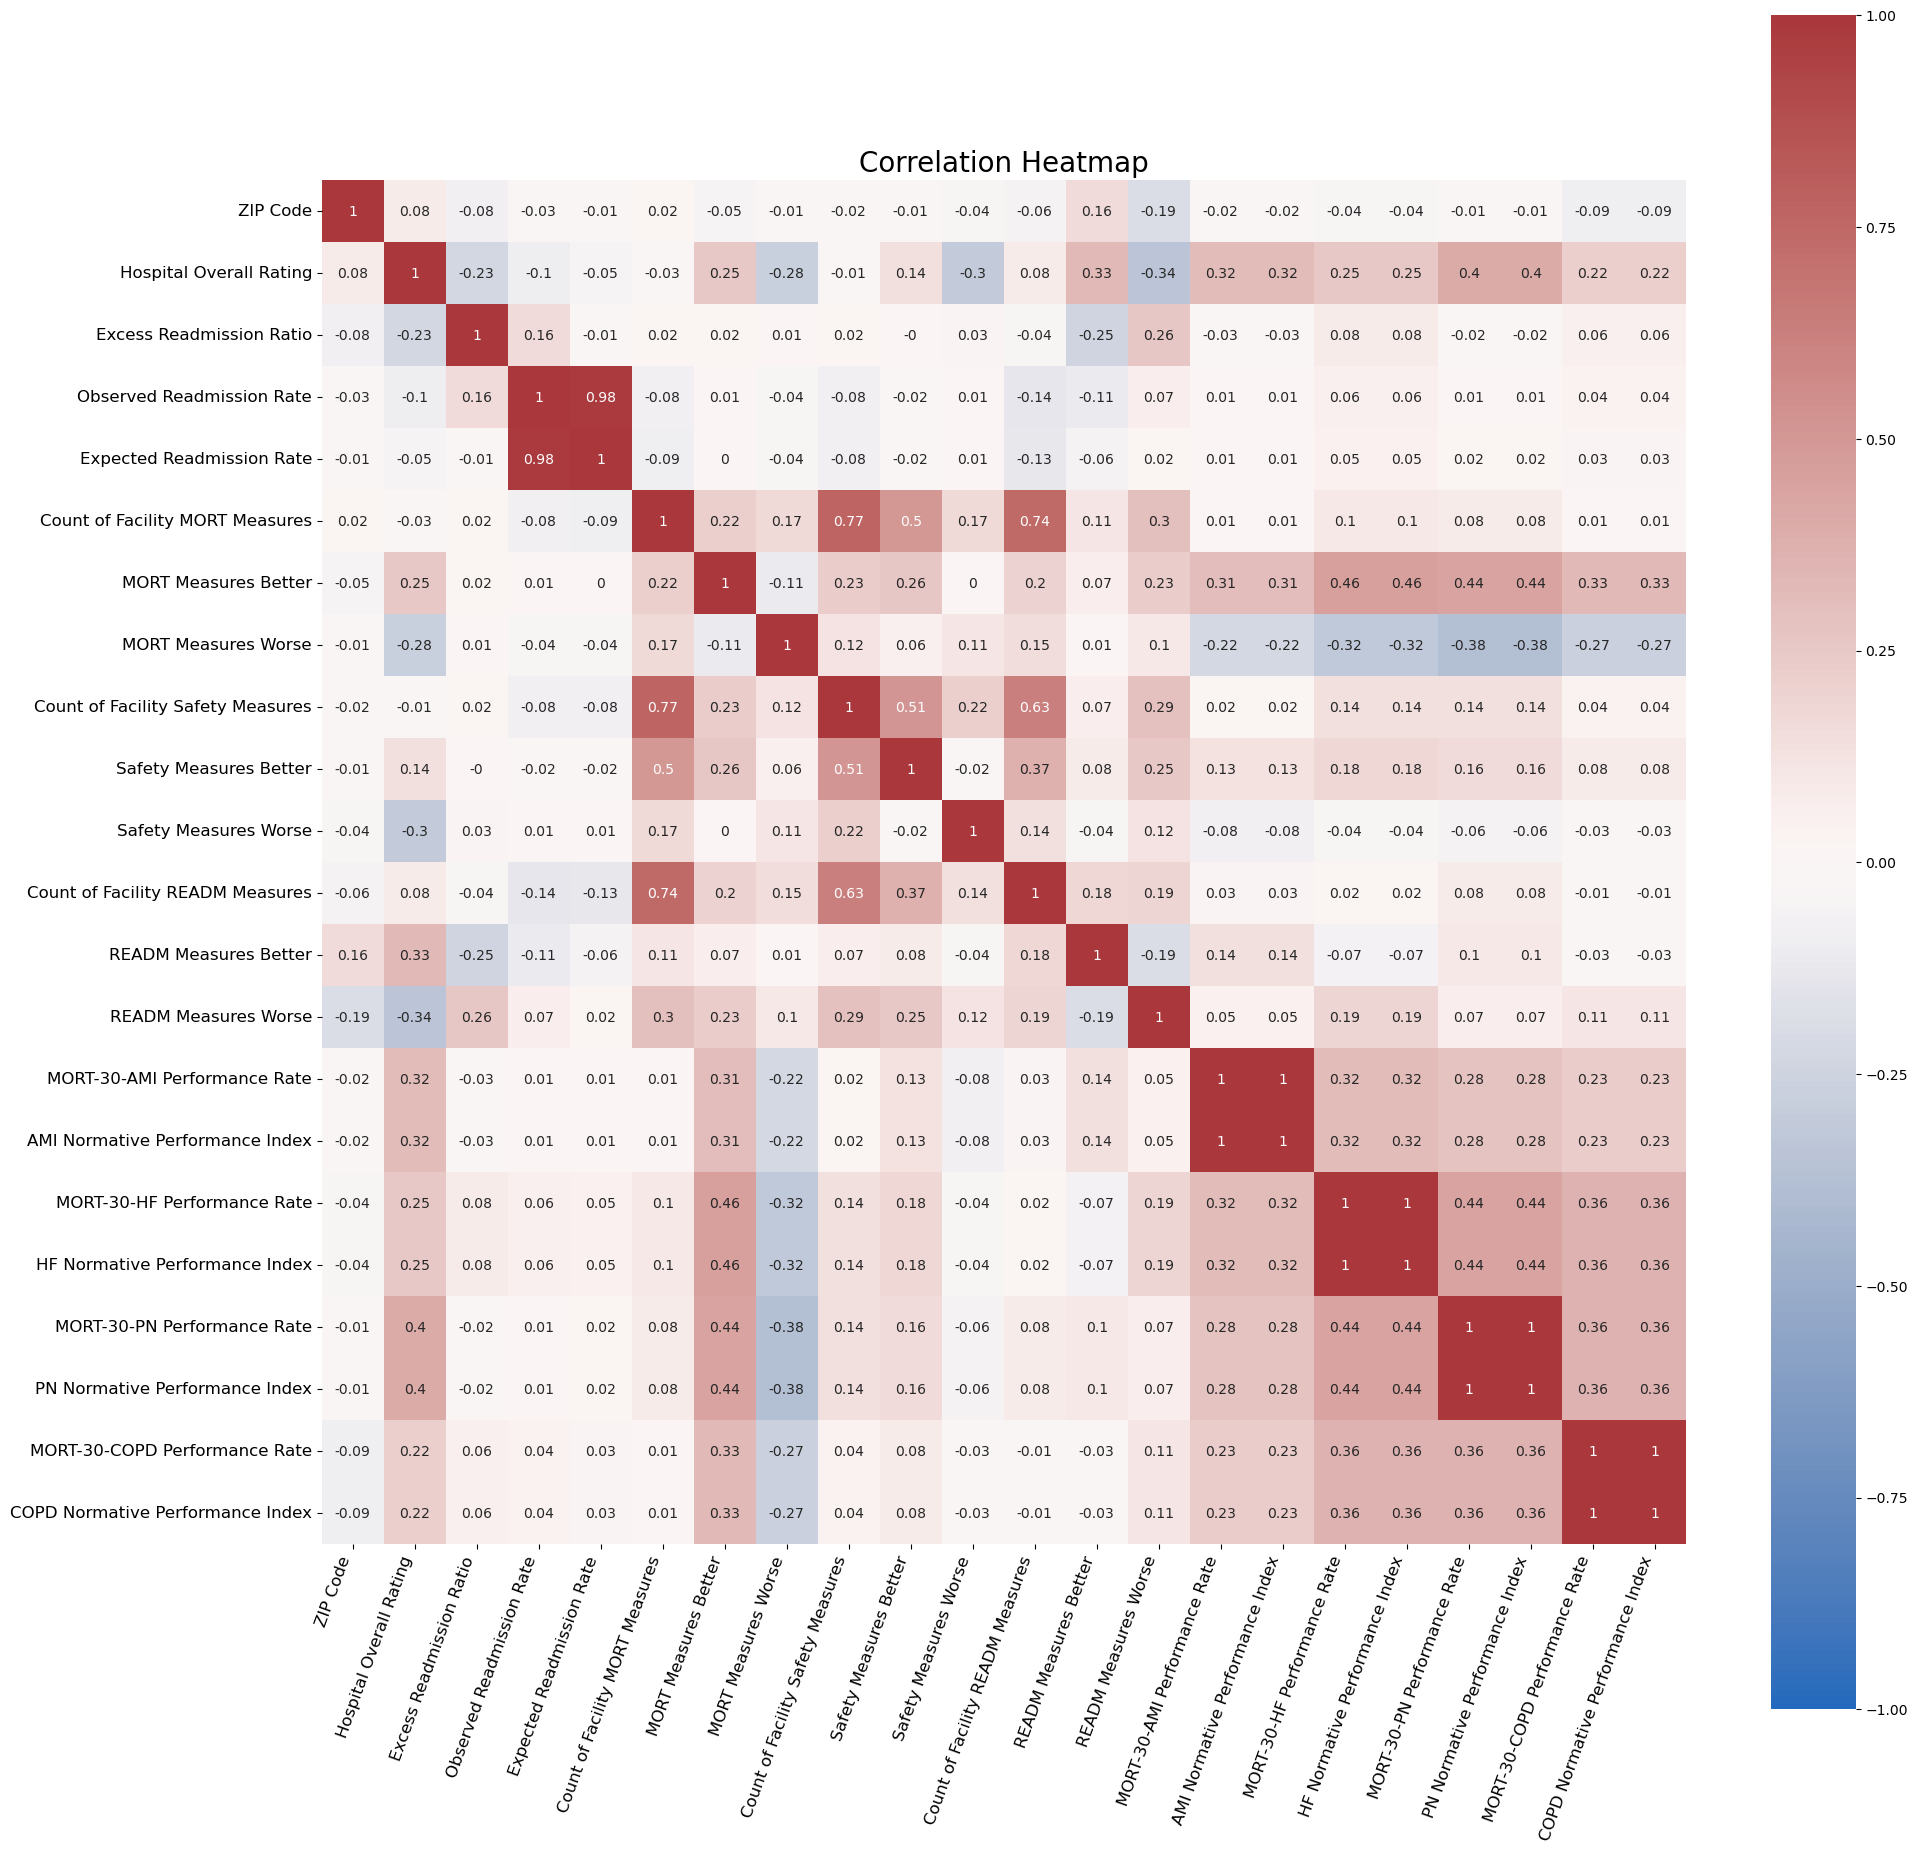

In [16]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(22,22))


# Create correlation heatmap in seaborn by applying heatmap onto correlation matrix and the the defined subplot
corr_heatmap_1 = sns.heatmap(df_sub_numeric.corr().round(2), annot=True, ax=ax, cmap='vlag', # 'annot' argument places correlation coefficent onto the heatmap
                              vmin=-1, vmax=1, square=True,
                              annot_kws={'fontsize': 10, 'ha':'center', 'va':'center'})

# Change font properties for the column labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=70, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, rotation=0)
ax.set_title('Correlation Heatmap', fontsize=20) # Add title properties

> **Discuss what the coefficients in the plot mean in terms of the relationships between the variables.**
>
> The correlation coefficient in the heatmap represents the strength of linear relationships between variables. A correlation coefficient closer to 1 indicates a stronger linear relationship between the two variables. The sign of the coefficient (negative or positive) indicates the direction of this relationship. For instance, if one variable increases as the other decreases, the correlation coefficient between them will be negative. Conversely, if both variables tend to increase together, the coefficient will be positive.
>
> **Example**
>
> - "Hospital Overall Rating" and "Excess Readmission Ratio" have a **negative correlation coefficient of -0.23**, this means **when a Hospital's Overall Rating is higher, the Excess Readmission Ratio tends to be lower.**

### 03b. Scatterplots

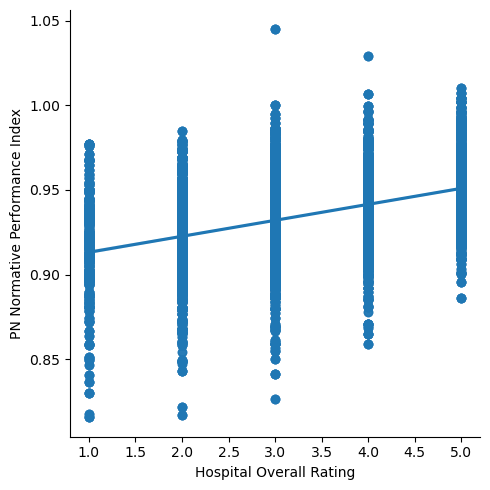

In [17]:
# Create scatter plot for the 'Hospital Overall rating' and 'PN Performance Index' columns

sns.lmplot(x='Hospital Overall Rating', y='PN Normative Performance Index', data=df_sub_numeric)

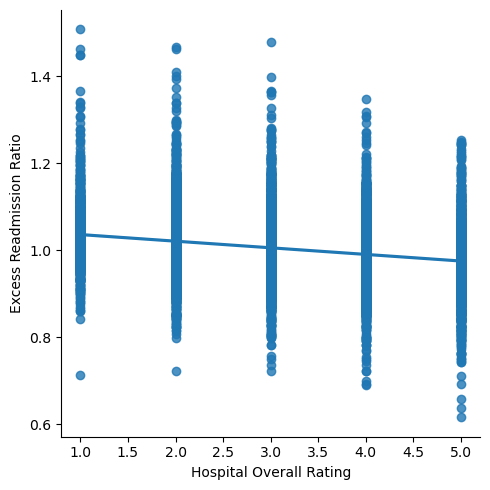

In [18]:
# Create scatter plot for the 'Hospital Overall rating' and 'Excess Readmission Ratio' columns

sns.lmplot(x='Hospital Overall Rating', y='Excess Readmission Ratio', data=df_sub_numeric)

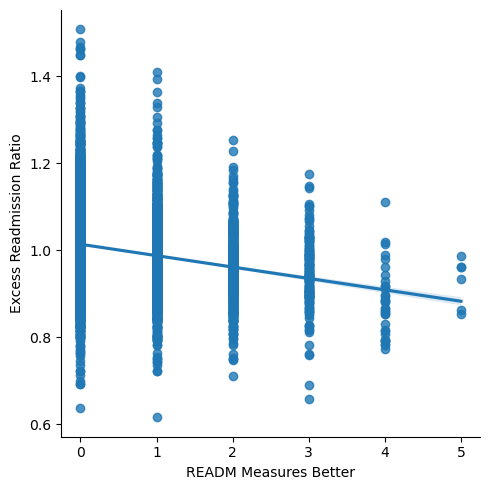

In [19]:
# Create scatter plot for the 'READM Measures Better' and 'Excess Readmission Ratio' columns

sns.lmplot(x='READM Measures Better', y='Excess Readmission Ratio', data=df_sub_numeric)

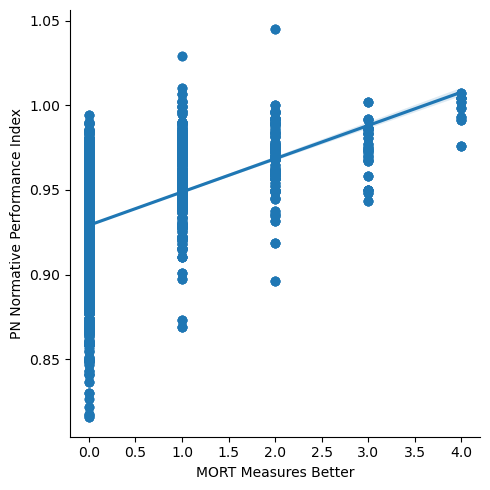

In [20]:
# Create scatter plot for the 'MORT Measures Better' and 'PN Normative Performance Index' columns

sns.lmplot(x='MORT Measures Better', y='PN Normative Performance Index', data=df_sub_numeric)

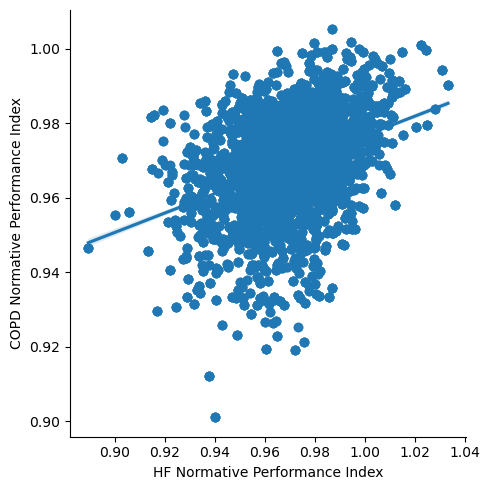

In [21]:
# Create scatter plot for the 'HF Normative Performance Index' and 'COPD Normative Performance Index' columns

sns.lmplot(x='HF Normative Performance Index', y='COPD Normative Performance Index', data=df_sub_numeric)

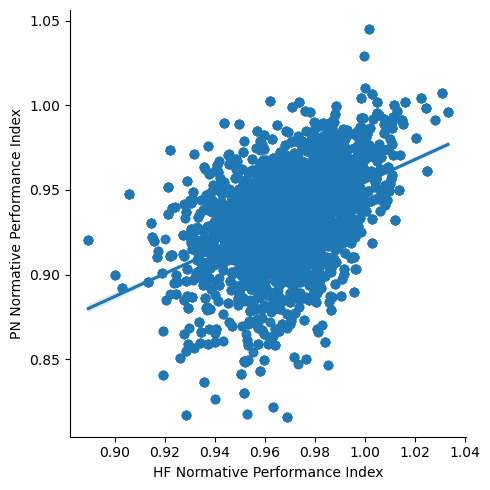

In [22]:
# Create scatter plot for the 'HF Normative Performance Index' and 'PN Normative Performance Index' columns

sns.lmplot(x='HF Normative Performance Index', y='PN Normative Performance Index', data=df_sub_numeric)

> **Discussing these relationships.**
>
> When selecting variables to explore relationships, I focused on variables that originated from different datasets before merging. This decision was motivated by the creation of new variables derived numerically from existing ones, which ensured robust relationships among them. Additionally, some correlations are inherent due to shared categorical metrics within the same dataset. For instance, variables such as the "Count of Facility MORT Measures", "Count of Facility READM Measures", and "Count of Facility Safety Measures" exhibit high correlations with "MORT Measures Better/Worse", "READM Measures Better/Worse", and "Safety Measures Better/Worse". These correlations often arise because of the nature of what these variables measure.
>
> I specifically chose variables that combine categorical and continuous aspects to gain deeper insights into their relationships. For instance, in the third scatterplot, an increase in a hospital's measures for reducing readmissions correlates with a decrease in their excess readmission ratio.
>
> Additionally, I examined continuous variables such as performance ratios for conditions like acute myocardial infarction (AMI), heart failure (HF), pneumonia (PN), and chronic obstructive pulmonary disease (COPD). These ratios compare hospital performance against peers, with index numbers above 1 indicating superior performance. As seen in the last scatterplot, higher performance indices for HF and PN correspond to each other, suggesting hospitals excelling in one mortality category tend to excel in others, specifically HF and PN.

### 03c. Pair Plots

In [23]:
# Create subset of variables to be included in the pairplot

df_pair_plot = df_sub_numeric[
    [
        'Hospital Overall Rating',
        'Excess Readmission Ratio',
        'Count of Facility MORT Measures',
        'MORT Measures Better',
        'Count of Facility Safety Measures',
        'Safety Measures Better',
        'Count of Facility READM Measures',
        'READM Measures Better',
        'AMI Normative Performance Index',
        'HF Normative Performance Index',
        'PN Normative Performance Index',
        'COPD Normative Performance Index',
    ]
]

<Figure size 6000x6000 with 0 Axes>

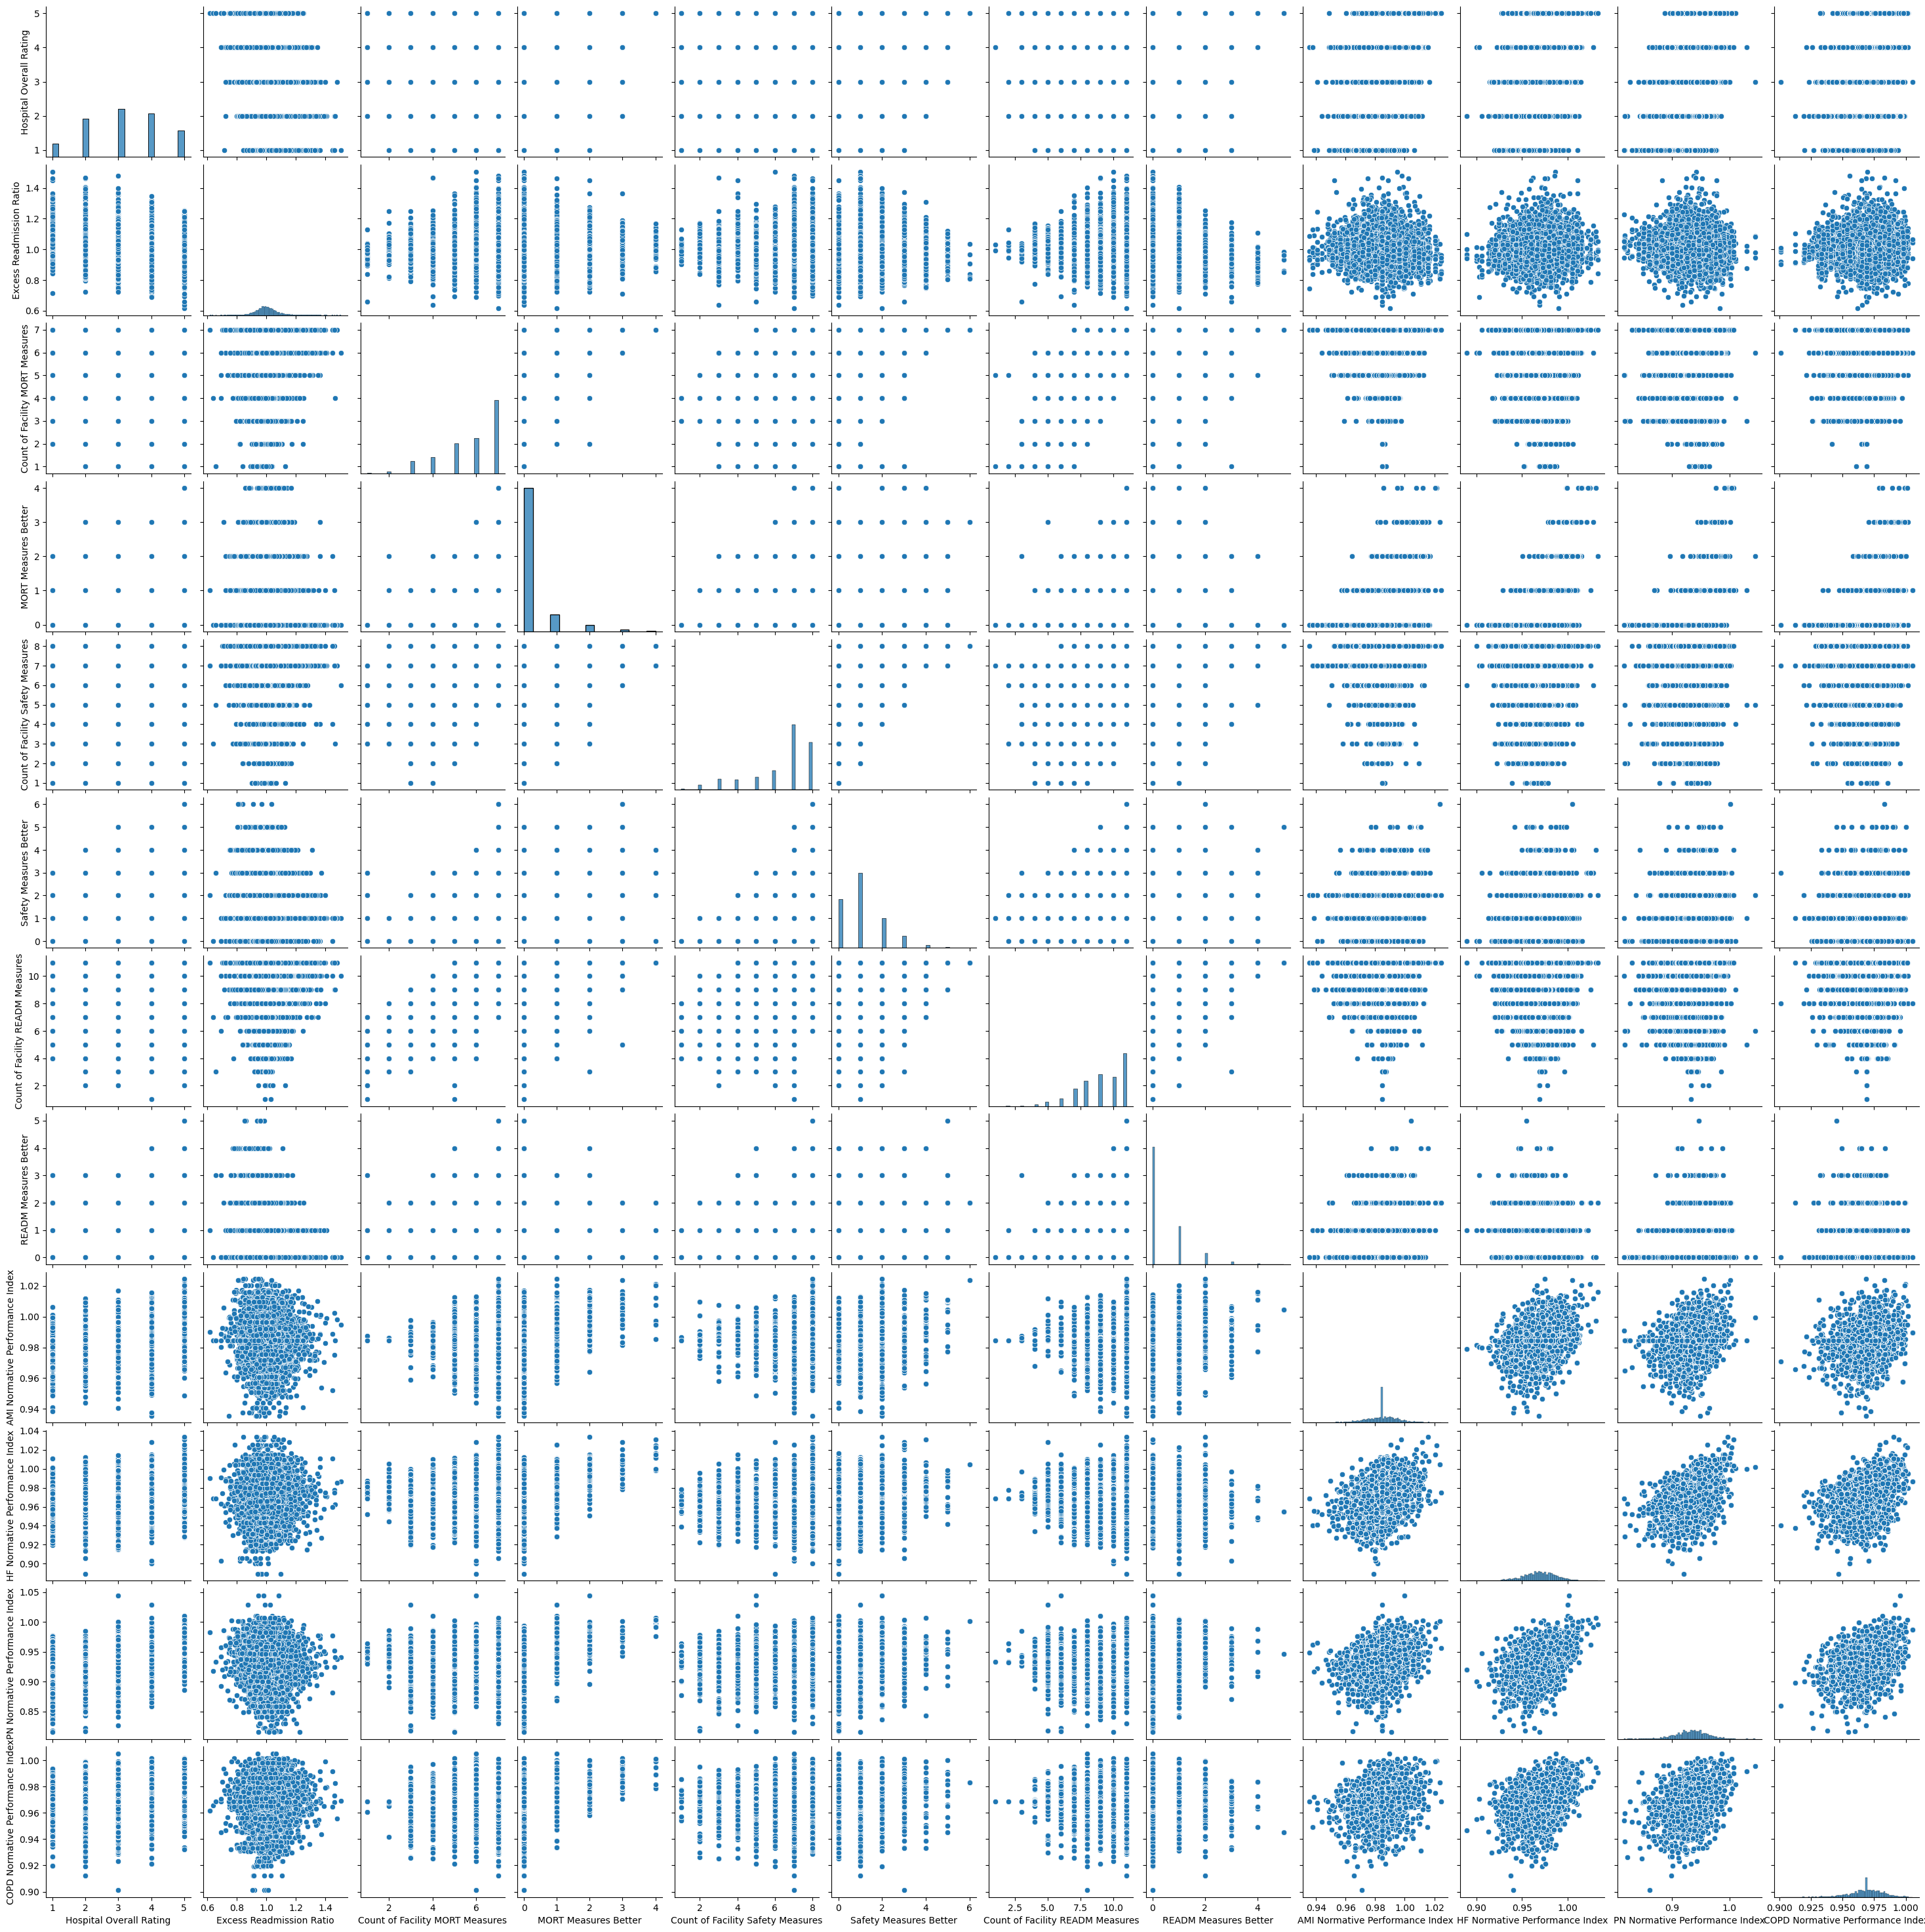

In [24]:
# Create Pair plot of the dataset

plt.figure(figsize=(60, 60))
pair_plot = sns.pairplot(df_pair_plot)

>**Discussing the distribution of the variables.**
>
>After observing the pair plot, I will primarily focus my analysis on continuous numeric variables such as "Excess Readmission Ratio," "AMI Normative Performance Index," "HF Normative Performance Index," "PN Normative Performance Index," and "COPD Normative Performance Index." The scatterplots for these variables exhibit more fluid relationships compared to those involving categorical variables, such as the "MORT/Safety/READM Measures Better" variables.
>
> However, I will still consider categorical variables in the analysis moving forward, as they reveal interesting distributions. For example, in the "Hospital Overall Rating" variable, there is a noticeable trend where higher Performance Index values correspond with higher hospital ratings. Similarly, hospitals with more "Readmission Measures Better" than their peers show a slight positive correlation with Performance Index values.

### 03d. Categorical Plots

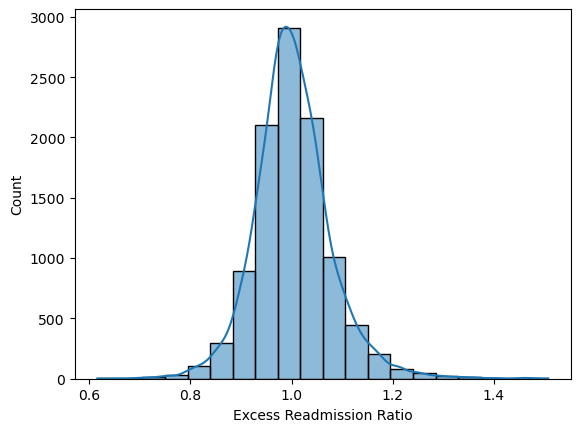

In [25]:
# Create a histogram to visualize the distribution of 'Excess Readmission Ratio'

excess_readm_hist = sns.histplot(df['Excess Readmission Ratio'], bins=20, kde=True)

In [26]:
# Create copy of dataframe
df_1 = df.copy()

# Create new varible called 'Excess Readmission Comparison'
df_1.loc[df['Excess Readmission Ratio'] < 0.95, 'Excess Readmission Comparison']='Low Excess Readmissions'
df_1.loc[(df_1['Excess Readmission Ratio'] >= 0.95) & (df_1['Excess Readmission Ratio'] < 1.05), 'Excess Readmission Comparison']='Average Excess Readmissions'
df_1.loc[df_1['Excess Readmission Ratio'] >= 1.05, 'Excess Readmission Comparison']='High Excess Readmissions'

In [27]:
# Check output

df_1['Excess Readmission Comparison'].value_counts(dropna=False)

Excess Readmission Comparison
Average Excess Readmissions    5847
High Excess Readmissions       2281
Low Excess Readmissions        2216
Name: count, dtype: int64

In [28]:
# Check columns

df_1.columns

Index(['Facility ID', 'Facility Name', 'State', 'Address', 'City/Town',
       'ZIP Code', 'County/Parish', 'Telephone Number', 'Hospital Type',
       'Hospital Ownership', 'Emergency Services',
       'Promotes Interoperability of EHRs', 'Birthing Friendly Facility',
       'Hospital Overall Rating', 'Measure Name', 'Excess Readmission Ratio',
       'Observed Readmission Rate', 'Expected Readmission Rate',
       'Excess Readmissions Threshold', 'Count of Facility MORT Measures',
       'MORT Measures Better', 'MORT Measures Worse',
       'Count of Facility Safety Measures', 'Safety Measures Better',
       'Safety Measures Worse', 'Count of Facility READM Measures',
       'READM Measures Better', 'READM Measures Worse',
       'MORT-30-AMI Benchmark', 'MORT-30-AMI Performance Rate',
       'AMI Normative Performance Index', 'AMI Performance Comparison',
       'MORT-30-HF Benchmark', 'MORT-30-HF Performance Rate',
       'HF Normative Performance Index', 'HF Performance Compariso

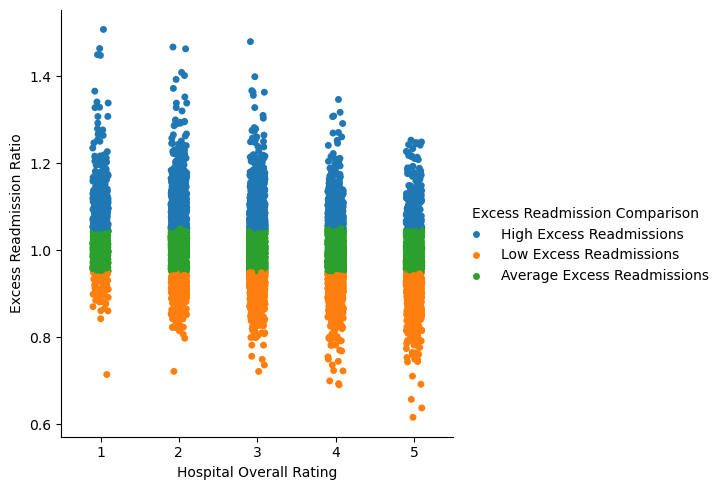

In [29]:
# Create a categorical plot using the 'Excess Readmission Comparison' categories

hosp_rating_readm_ratio_catplot = sns.catplot(
    x="Hospital Overall Rating",
    y="Excess Readmission Ratio",
    hue="Excess Readmission Comparison",
    data=df_1
)


> I created this plot to visually confirm the expected distribution of categories based on the Excess Readmission Ratio. As anticipated, the categories—High Excess Readmissions, Average Excess Readmissions, and Low Excess Readmissions—are clearly distinguished on the y-axis. High Excess Readmissions are prominently positioned at the top, Average Excess Readmissions are centrally located, and Low Excess Readmissions are predominantly found at the bottom of the plot. This visualization effectively illustrates the distribution across these categories.

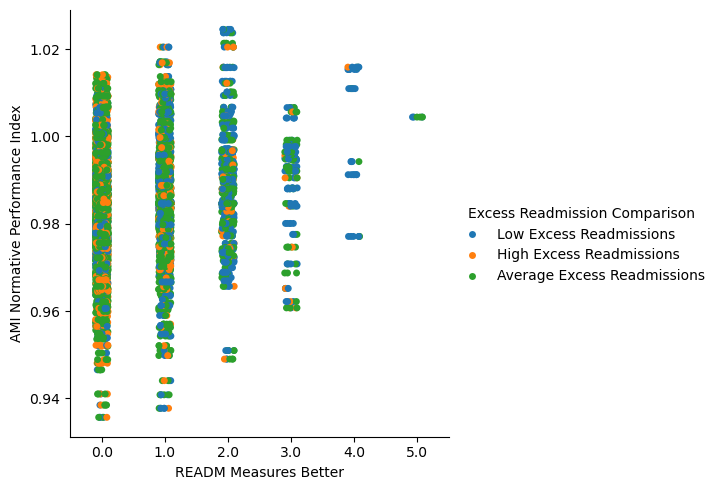

In [30]:
# Create a categorical plot using the 'Excess Readmission Comparison' categories

readm_measures_better_ami_catplot = sns.catplot(
    x="READM Measures Better",
    y="AMI Normative Performance Index",
    hue="Excess Readmission Comparison",
    data=df_1
)


> I created this plot to analyze the distribution of excess readmission rates across performance indexes, specifically focusing on the AMI (Acute Myocardial Infarction) Performance Index and the number of readmission measures that are better than hospital peers. The scatter plot shows how the AMI Performance Index correlates with the number of readmission measures where hospitals perform better than their peers. The data points are color-coded based on the "Excess Readmission Comparison" categories: Low Excess Readmissions (blue), Average Excess Readmissions (green), and High Excess Readmissions (orange).
>
> Key observations from the plot reveal a positive correlation between the number of readmission measures better than peers and the AMI Performance Index. Hospitals with more readmission measures better than their peers tend to have higher AMI Performance Index scores. Additionally, the plot shows that hospitals with high excess readmissions (orange) tend to cluster at the lower end of the readmission measures better than peers, indicating that these hospitals struggle to outperform their peers in readmission measures. This analysis suggests that improving readmission measures could enhance a hospital's overall performance in AMI.

> **Defining Possible Hypotheses**
>
> 1. **Using Hospital Types** (also: Interoperability of EHRs, Birthing Friendly, Emergency Services, etc)
>    - H0:There is no difference in excess admission rates between public and private types.
>    - H1:There is a difference in excess admission rates between public and private hospitals.
> 2. **Geospatial**
>    - H0: There is no difference in excess admission rates between hospitals by region.
>    - H1: There is a difference in excess admission rates between hospitals by region.
> 3. **Using Performance Measures**
>    - H0: There is no difference in the performance metrics for AMI, HF, PN, and COPD between hospitals with lower excess readmission ratios and those with higher excess readmission ratios.
>    - H1:There is a difference in the performance metrics for AMI, HF, PN, and COPD between hospitals with lower excess readmission ratios and those with higher excess readmission ratios.
> 

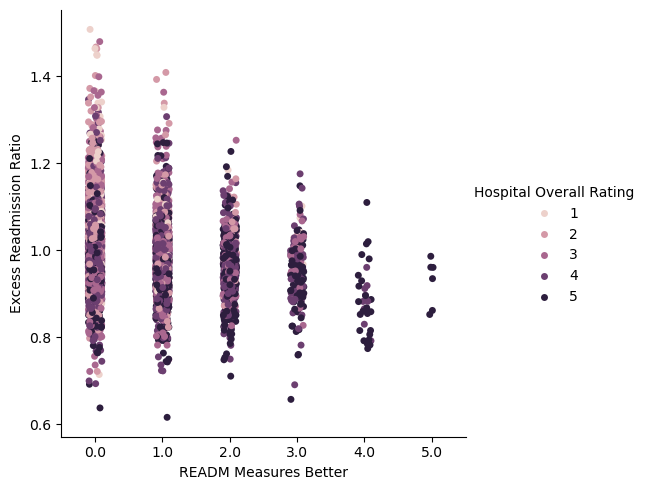

In [31]:
# Create a categorical plot using the 'Excess Readmission Comparison' categories

new_catplot = sns.catplot(
    x="READM Measures Better",
    y="Excess Readmission Ratio",
    hue="Hospital Overall Rating",
    data=df_1
)


## 04. Exporting Data and Figures

In [32]:
# Export new df

df_1.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hrrp_hgi_hvbp_1.csv'), index=False)

In [33]:
# Export readm_measures_better_ami_catplot

readm_measures_better_ami_catplot.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hrrp_hgi_hvbp_1.png'), bbox_inches='tight')

In [34]:
f.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'correlations_heatmap.png'), bbox_inches='tight')